# 1.初始準備
## keras可以用不同深度學習套件當作底層，在此指定用Tensorflow保持一致性。

In [2]:
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


## 標準數據分析動作

In [3]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# 讀入MNIST數據庫

In [4]:
from keras.datasets import mnist

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [6]:
len(x_train)

60000

In [7]:
len(y_train)

60000

In [8]:
len(x_test)

10000

In [9]:
x_train[9487].shape

(28, 28)

In [10]:
x_train[9487]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 240,
        253, 165,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  32, 241,
        252, 252,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

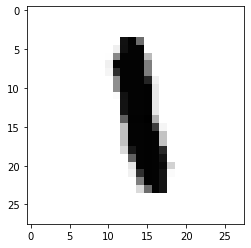

In [11]:
plt.imshow(x_train[9487],cmap='Greys')

In [12]:
y_train[9487]

1

# 輸入格式整理

In [13]:
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)

In [14]:
x_train[9487]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0, 240, 253, 165,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,  32, 241, 252, 252,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   2, 141, 25

# 輸出格式整理

In [15]:
from keras.utils import np_utils

In [16]:
y_train = np_utils.to_categorical(y_train, 10)

In [17]:
y_test = np_utils.to_categorical(y_test, 10)

In [18]:
y_train[9487]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

# 打造第一個神經網路

In [19]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

In [20]:
model = Sequential()

使用2個hidden layers

每個hidden layer用500個神經元

Activation Function唯一指名sigmoid

每次用add去加一層，從第一個隱藏曾開始，而第一個隱藏曾因為Keras不知道輸入有幾個features，所以需要告訴它。

In [21]:
model.add(Dense(500, input_dim = 784))
model.add(Activation('sigmoid'))

第二層hidden layer不用再告訴它輸入。

In [22]:
model.add(Dense(500))
model.add(Activation('sigmoid'))

輸出用softmax令sum= 1

In [23]:
model.add(Dense(10))
model.add(Activation('softmax'))

# 組裝神經網路

做compile來建構神經網路:

* 決定使用的loss function,一般是mse
* 設定optimizer,用標準的SGD
* 設learning rate

為了一邊訓練一邊看到結果，加設:

    metrics=['accuracy']
    
這個跟神經網路功能沒有關係。

In [24]:
model.compile(loss='mse',optimizer=SGD(lr=0.1),
             metrics=['accuracy'])

# 檢視神經網路

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               392500    
_________________________________________________________________
activation (Activation)      (None, 500)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               250500    
_________________________________________________________________
activation_1 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5010      
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 648,010
Trainable params: 648,010
Non-trainable params: 0
__________________________________________________

## 上面這些數字來源

784*500(連結神經元) + 500(bias) = 392500

500*500 + 500 = 250500

500*10 + 10 =5010

# 訓練第一個神經網路

* 一次要訓練幾筆資料(batch_size)，此處設每100筆調1次
* 這六萬筆資料要訓練幾次(epochs)，此處設訓練20次　

In [26]:
model.fit(x_train, y_train, batch_size = 100, epochs = 20)

Epoch 1/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0865 - accuracy: 0.2846
Epoch 2/20
600/600 [==============================] - 3s 4ms/step - loss: 0.0663 - accuracy: 0.5603
Epoch 3/20
600/600 [==============================] - 3s 4ms/step - loss: 0.0486 - accuracy: 0.7399
Epoch 4/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0349 - accuracy: 0.8307
Epoch 5/20
600/600 [==============================] - 3s 4ms/step - loss: 0.0270 - accuracy: 0.8665
Epoch 6/20
600/600 [==============================] - 3s 4ms/step - loss: 0.0222 - accuracy: 0.8835
Epoch 7/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0193 - accuracy: 0.8951
Epoch 8/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0176 - accuracy: 0.8995
Epoch 9/20
600/600 [==============================] - 3s 4ms/step - loss: 0.0160 - accuracy: 0.9095
Epoch 10/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0147 - accuracy: 0.9147

# 試用訓練結果

In [27]:
from ipywidgets import interact_manual

In [28]:
predict = model.predict_classes(x_test)

C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [29]:
def test(測試編號):
    plt.imshow(x_test[測試編號].reshape(28,28), cmap='Greys')
    print("神經網路判斷為:",predict[測試編號])

In [30]:
interact_manual(test, 測試編號 = (0,9999));

interactive(children=(IntSlider(value=4999, description='測試編號', max=9999), Button(description='Run Interact', …

上列只是jupyter notebook的互動功能，不會也沒關係

# 將訓練好的神經網路存起來

In [32]:
model_json = model.to_json()
open('handwriting_model_architecture.json','w').write(model_json)
model.save_weights('handwriting_model_weights.h5')